In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# ==========================================
# 設定エリア（ここを変更してください）
# ==========================================
SOURCE_FILE = 'recording3.wav'   # 変換したいWAVファイル名
OUTPUT_DIR = 'output_spectrograms3' # 画像の保存先フォルダ名
CHUNK_SEC = 10                   # 1枚の画像の長さ（秒）
SAMPLE_RATE = None               # None=元の音質を維持、16000などにすると軽量化
# ==========================================

def save_spectrograms():
    # 1. ファイルの存在確認
    if not os.path.exists(SOURCE_FILE):
        print(f"エラー: '{SOURCE_FILE}' が見つかりません。同じフォルダに置いてください。")
        return

    # 2. 保存フォルダの作成
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        print(f"フォルダ作成: {OUTPUT_DIR}")

    # 3. 音声の読み込み（時間がかかる場合があります）
    print(f"音声を読み込んでいます... ({SOURCE_FILE})")
    y, sr = librosa.load(SOURCE_FILE, sr=SAMPLE_RATE)
    
    total_duration = librosa.get_duration(y=y, sr=sr)
    total_chunks = math.ceil(total_duration / CHUNK_SEC)
    
    print(f"音声の長さ: {total_duration:.2f}秒")
    print(f"画像生成数: {total_chunks}枚 (1枚あたり{CHUNK_SEC}秒)")

    # 4. 分割して画像化ループ
    for i in range(total_chunks):
        # 開始・終了サンプルの計算
        start_sample = i * CHUNK_SEC * sr
        end_sample = min((i + 1) * CHUNK_SEC * sr, len(y))
        
        # 切り出し
        y_chunk = y[int(start_sample):int(end_sample)]
        
        # データが空ならスキップ
        if len(y_chunk) == 0:
            continue

        # --- 画像化処理 ---
        plt.figure(figsize=(10, 4)) # 画像サイズ (幅, 高さ)
        
        # STFT (短時間フーリエ変換)
        D = librosa.stft(y_chunk)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        
        # 描画
        librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Segment {i+1}/{total_chunks} ({i*CHUNK_SEC}-{(i+1)*CHUNK_SEC} sec)')
        plt.tight_layout()
        
        # 保存
        filename = f"spec_{i+1:03}.png" # spec_001.png のような名前
        save_path = os.path.join(OUTPUT_DIR, filename)
        
        plt.savefig(save_path)
        plt.close() # メモリ解放（超重要）
        
        print(f"保存完了 [{i+1}/{total_chunks}]: {filename}")

    print("すべての処理が完了しました。")

if __name__ == "__main__":
    save_spectrograms()

フォルダ作成: output_spectrograms3
音声を読み込んでいます... (recording3.wav)
音声の長さ: 171.54秒
画像生成数: 18枚 (1枚あたり10秒)
保存完了 [1/18]: spec_001.png
保存完了 [2/18]: spec_002.png
保存完了 [3/18]: spec_003.png
保存完了 [4/18]: spec_004.png
保存完了 [5/18]: spec_005.png
保存完了 [6/18]: spec_006.png
保存完了 [7/18]: spec_007.png
保存完了 [8/18]: spec_008.png
保存完了 [9/18]: spec_009.png
保存完了 [10/18]: spec_010.png
保存完了 [11/18]: spec_011.png
保存完了 [12/18]: spec_012.png
保存完了 [13/18]: spec_013.png
保存完了 [14/18]: spec_014.png
保存完了 [15/18]: spec_015.png
保存完了 [16/18]: spec_016.png
保存完了 [17/18]: spec_017.png
保存完了 [18/18]: spec_018.png
すべての処理が完了しました。


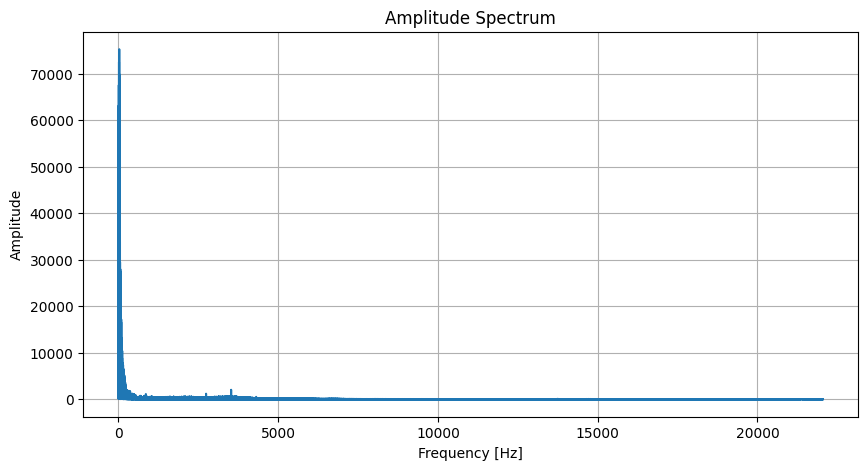

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# ===== 音声ファイルを読み込む =====
file_path = "recording1.wav"  # 任意の音声ファイル
y, sr = librosa.load(file_path, sr=None)  # sr=Noneで元のサンプリングレートを保持

# ===== FFT（高速フーリエ変換） =====
N = len(y)                           # サンプル数
fft = np.fft.fft(y)                  # FFT
fft = np.abs(fft)[:N//2]             # 振幅スペクトル（片側だけ）
freq = np.fft.fftfreq(N, 1/sr)[:N//2]  # 周波数軸を計算

# ===== プロット =====
plt.figure(figsize=(10, 5))
plt.plot(freq, fft)
plt.title("Amplitude Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

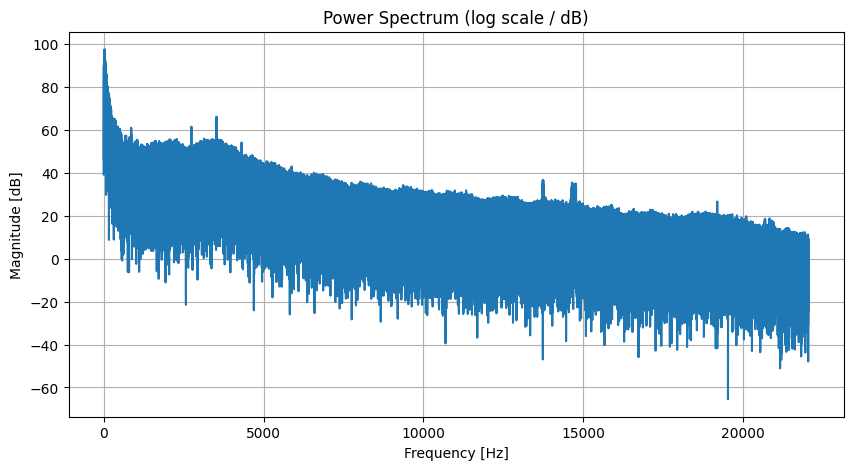

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

file_path = "recording1.wav"
y, sr = librosa.load(file_path, sr=None)

N = len(y)
fft = np.abs(np.fft.fft(y))[:N//2]
freq = np.fft.fftfreq(N, 1/sr)[:N//2]

# ===== dBスケールに変換 =====
fft_db = 20 * np.log10(fft + 1e-8)   # 1e-8 は log(0) 回避のため

plt.figure(figsize=(10,5))
plt.plot(freq, fft_db)
plt.title("Power Spectrum (log scale / dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.show()